<a href="https://colab.research.google.com/github/Sulbae/Study-Material/blob/main/Studi_Kasus_Ketiga_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://github.com/opencv/opencv/blob/4.x/data/haarcascades/haarcascade_frontalface_default.xml

--2024-11-12 07:23:29--  https://github.com/ajitharunai/Facial-Emotion-Recognition-with-OpenCV-and-Deepface/blob/main/haarcascade_frontalface_default.xml
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal     [  <=>               ]   4.22M  13.6MB/s    in 0.3s    

2024-11-12 07:23:30 (13.6 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [4423206]



In [ ]:
import cv2
from deepface import DeepFace

# Membuat daftar label emosi
emotion_labels = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]

# Memuat face cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Mulai menangkap video
cap = cv2.VideoCapture(0)
while True:

    # Menangkap frame per frame
    ret, frame = cap.read()
    # Mengonversi frame ke grayscale

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Mengonversi frame grayscale ke format RGB
    rgb_frame = cv2.cvtColor(gray_frame, cv2.COLOR_GRAY2RGB)

    # Mendeteksi wajah dalam frame
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor = 1.1, minNeighbors = 5, minSize = (30, 30))
    for (x, y, w, h) in faces:

        # Ekstrak ROI (Region of Interest) dari wajah
        face_roi = rgb_frame[y:y + h, x:x + w]

        # Melakukan analisis emosi pada ROI wajah
        result = DeepFace.analyze(face_roi, actions = ["emotion"], enforce_detection = False)

        # Menentukan emosi yang dominan
        emotion = result[0]["dominant_emotion"]

        # Menggambar kotak di sekitar wajah dan menampilkan label dengan emosi yang diprediksi
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(frame, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

        # Menampilkan frame hasil
        cv2.imshow("Deteksi Emosi Waktu Nyata", frame)

        # Tekan "q" untuk keluar
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
# Melepaskan video capture dan menutup semua jendela
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


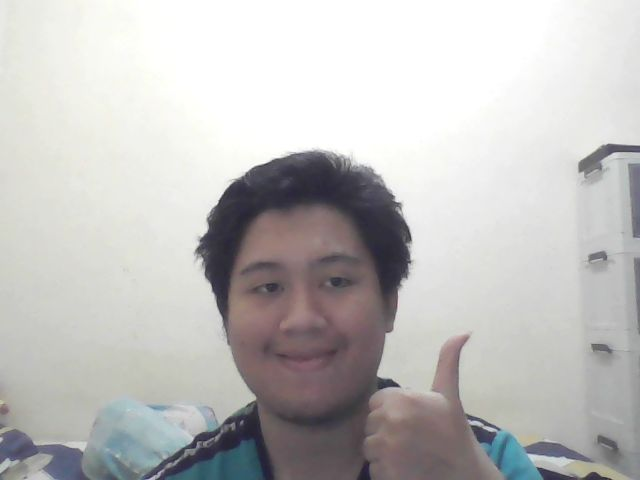

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))